In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 72s 6us/step


In [4]:
X_train.shape

(60000, 28, 28)

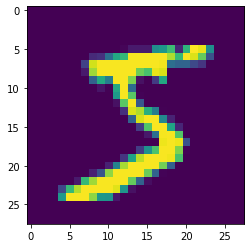

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
def preprocess_image(images):
    images = images / 255
    return images
X_train = preprocess_image(X_train)
X_test = preprocess_image(X_test)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Flatten())
model.add(Dense(32, 'relu'))
model.add(Dense(10))
model.add(Softmax())
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
save_cp = ModelCheckpoint('model', save_best_only = True)
history_cp = tf.keras.callbacks.CSVLogger('history.csv', separator = ',')
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, callbacks = [save_cp, history_cp])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3515 - accuracy: 0.9024 - val_loss: 0.2279 - val_accuracy: 0.9341
INFO:tensorflow:Assets written to: model\assets
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1986 - accuracy: 0.9423 - val_loss: 0.1703 - val_accuracy: 0.9501
INFO:tensorflow:Assets written to: model\assets
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1582 - accuracy: 0.9541 - val_loss: 0.1420 - val_accuracy: 0.9589
INFO:tensorflow:Assets written to: model\assets
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1373 - accuracy: 0.9607 - val_loss: 0.1383 - val_accuracy: 0.9605
INFO:tensorflow:Assets written to: model\assets
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1239 - accuracy: 0.9647 - val_loss: 0.1283 - val_accuracy: 0.9639
INFO:tensorflow:Assets written to: model\assets


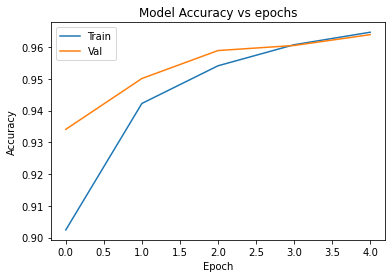

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

history = pd.read_csv('history.csv')
fig = plt.figure()
plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()